In [3]:
import json
import pandas as pd
import numpy as np
import pickle
from sklearn import tree
from sklearn.cross_validation import train_test_split
import cv2
from os import listdir
from os.path import isfile, join
from sklearn.linear_model import LogisticRegression, Ridge
from scipy.stats import pearsonr
from sklearn.metrics import confusion_matrix, mean_absolute_error, precision_score, recall_score, roc_auc_score
import matplotlib.pyplot as plt
from IPython.display import display
#import statsmodels.formula.api as sm
import statsmodels.api as sm
#import face_recognition
import sys
import exifread
import math
from matplotlib.ticker import MaxNLocator
from sklearn.cluster import KMeans
from sklearn import mixture
from scipy import stats as st

# pandas
import pickle
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as statsa
sns.set_style('whitegrid')
%matplotlib inline

# machine learning
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


###
import itertools
from itertools import chain, combinations
import statsmodels.formula.api as smf
import scipy.stats as scipystats
import statsmodels.api as sm
import statsmodels.stats.stattools as stools
import statsmodels.stats as stats 
from statsmodels.graphics.regressionplots import *
import matplotlib.pyplot as plt
import seaborn as sns
import copy
from sklearn.cross_validation import train_test_split
import math
import time
from IPython.display import Image
#Imports
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.mixture import GMM

/Users/yanxinzhou/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/yanxinzhou/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
path='/Users/yanxinzhou/Course/Math564/project/nyc'
onlyfiles =listdir(path) # [ f for f in listdir(path) if isfile(join(path,f)) ]
#data = json.load(open('../notebook/data/ittsttre/ittsttre.json'))
num_follower=[]
num_following=[]
ID_list=[]
num_comment=[]
num_like=[]
img_name=[]
dict_name=[]
for i in range(0,len(onlyfiles)):
    filepath=path+'/'+onlyfiles[i]
    try:
        data = json.load(open(filepath+'/'+onlyfiles[i]+'.json'))# open the file
        
        for j in range(min(len(data),2)):
            ID_list.append(data[j]['id'])# get the id 
            num_like.append(list(data[j]['edge_media_preview_like'].values())[0]) # get the like#
            num_comment.append(list(data[j]['edge_media_to_comment'].values())[0])  # get the comment#
            s=data[j]['display_url']# get the name
            name=s.split('/')
            img_name.append(name[-1])
            dict_name.append(onlyfiles[i])

    except FileNotFoundError as err:
        pass
    except NotADirectoryError as err1:
        pass
    
    
#filelsit=onlyfiles.split(',')

In [3]:
mapping={'ID':ID_list,'like':num_like,'comment':num_comment,'name':img_name,'dict':dict_name}
DF=pd.DataFrame(mapping, index=ID_list)

In [4]:
output = open('/Users/yanxinzhou/Course/Math564/project/dataframe.pkl', 'wb')
pickle.dump(DF, output, -1)
output.close()

In [5]:
DF.shape

(3188, 5)

In [24]:
pkl_file = open('/Users/yanxinzhou/Course/Math564/project/df.pkl', 'rb')
df2 = pickle.load(pkl_file)
pkl_file.close()

In [25]:
result=DF.join(df2.set_index('dict'), on='dict')

In [26]:
result=result.dropna()

In [158]:
result.shape

(2412, 26)

In [185]:
output = open('/Users/yanxinzhou/Course/Math564/project/result.pkl', 'wb')
pickle.dump(result, output, -1)
output.close()

In [28]:
del result['ID']

In [29]:
result.describe()
#list(result)

,comment,like
count,2412.000000,2412.000000
mean,4.511194,148.524876
std,11.444032,1137.858419
min,0.000000,0.000000
25%,0.000000,20.000000
50%,1.000000,49.000000
75%,4.000000,114.000000
max,211.000000,53158.000000


In [30]:
output = open('/Users/yanxinzhou/Course/Math564/project/testdf.pkl', 'wb')
pickle.dump(result, output, -1)
output.close()

In [6]:
pkl_file = open('/Users/yanxinzhou/Course/Math564/project/testdf.pkl', 'rb')
result = pickle.load(pkl_file)
pkl_file.close()

In [8]:
pkl_file = open('/Users/yanxinzhou/Course/Math564/project/with_hsv.pkl', 'rb')
add_df = pickle.load(pkl_file)
pkl_file.close()

## add features here

In [9]:
hsv_list=add_df.hsv.tolist()
hsv_list=np.array(hsv_list)
#hsv_list.shape
hsv_list=np.transpose(hsv_list)

avg_hue=hsv_list[0]
std_hue=hsv_list[1]
avg_sat=hsv_list[2]
std_sat=hsv_list[3]
avg_val=hsv_list[4]
std_val=hsv_list[5]

result['avg_hue']=avg_hue
result['std_hue']=std_hue
result['avg_sat']=avg_sat
result['std_sat']=std_sat
result['avg_val']=avg_val
result['std_val']=std_val

In [10]:
result.shape

(2412, 17)

In [12]:
file_path=result.dict.tolist()
img_name=result.name.tolist()
pathlist=['/Users/yanxinzhou/Course/Math564/project/nyc/'+file_path[i]+'/'+img_name[i] for i in range(len(file_path))]

In [364]:
pathlist

['/Users/yanxinzhou/Course/Math564/project/nyc/00tk7/23421290_1851452621832886_2386562766308638720_n.jpg',
 '/Users/yanxinzhou/Course/Math564/project/nyc/00tk7/23421361_168804363705572_6703415695230631936_n.jpg',
 '/Users/yanxinzhou/Course/Math564/project/nyc/02parth/23101185_1926660700917575_6293493596909731840_n.jpg',
 '/Users/yanxinzhou/Course/Math564/project/nyc/02parth/22710495_181427802434548_2987864698919059456_n.jpg',
 '/Users/yanxinzhou/Course/Math564/project/nyc/071998_/23421997_131910510905876_5413263594605248512_n.jpg',
 '/Users/yanxinzhou/Course/Math564/project/nyc/071998_/22858205_1714031801983001_7756309275529445376_n.jpg',
 '/Users/yanxinzhou/Course/Math564/project/nyc/13restaurant/23421336_1613584525368284_5729191394510110720_n.jpg',
 '/Users/yanxinzhou/Course/Math564/project/nyc/13restaurant/23417131_850076941837697_7924070560672251904_n.jpg',
 '/Users/yanxinzhou/Course/Math564/project/nyc/160shelf/23164680_306924896459121_9000171751941865472_n.jpg',
 '/Users/yanxinzh

In [5]:
## face detection
#load cascade classifier training file for haarcascade 
haar_face_cascade1 = cv2.CascadeClassifier('/Users/yanxinzhou/Course/Math564/project/haarcascade_frontalface_alt.xml')
haar_face_cascade2 = cv2.CascadeClassifier('/Users/yanxinzhou/Course/Math564/project/haarcascade_frontalface_default.xml')

In [13]:
face_count=[]
for i in range(len(pathlist)):
    try:
        imagePath=pathlist[i]
        image = cv2.imread(imagePath)
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        faces = haar_face_cascade1.detectMultiScale(gray, scaleFactor=1.8, minNeighbors=5);
        num_face=len(faces)
        face_count.append(num_face)
    except:
        face_count.append(-1)
#face_count

In [14]:
#len(face_count)
result['face_count']=face_count

In [6]:
def ReadData():
    #Data in format [B G R Label] from
    data = np.genfromtxt('/Users/yanxinzhou/Course/Math564/project/Skin_NonSkin.txt', dtype=np.int32)

    labels= data[:,3]
    data= data[:,0:3]

    return data, labels

data,labels =ReadData()

In [7]:
def BGR2HSV(bgr):
    bgr= np.reshape(bgr,(bgr.shape[0],1,3))
    hsv= cv2.cvtColor(np.uint8(bgr), cv2.COLOR_BGR2HSV)
    hsv= np.reshape(hsv,(hsv.shape[0],3))

    return hsv

flUseHSVColorspace=True

if(flUseHSVColorspace):
    data= BGR2HSV(data)

trainData, testData, trainLabels, testLabels = train_test_split(data, labels, test_size=0.20, random_state=42)

#clf=RandomForestClassifier(max_depth=3, random_state=0)
#clf = GaussianNB()
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(trainData, trainLabels)

In [9]:
def detectskin(path):
    img= cv2.imread(path)

    imgfm= np.reshape(img,(img.shape[0]*img.shape[1],3))

    if(flUseHSVColorspace):
            imgfm= BGR2HSV(imgfm)

    predictedLabels= clf.predict(imgfm)
    imgLabels= np.reshape(predictedLabels,(img.shape[0],img.shape[1],1))

    face = 2-imgLabels
    ratio= np.sum(face)/(img.shape[0]*img.shape[1])

#    if (flUseHSVColorspace):
#        cv2.imwrite('../notebook/data/%s.png'%(name),((-(imgLabels-1)+1)*255))# from [1 2] to [0 255]
#    else:
#        cv2.imwrite('../notebook/data/%s.png'%(name),((-(imgLabels-1)+1)*255))
        
    return ratio

    

In [ ]:
nudity=[]
for i in range(len(pathlist)):
    try:
        nudity.append(detectskin(pathlist[i]))
    except:
        nudity.append(-1)
 

In [19]:
result['nudity']=nudity
result.shape

(2412, 19)

## features

In [21]:
#get image size and channels from image
height=[]
width=[]
channels=[]

for i in range(len(pathlist)):
    try:
        imagePath=pathlist[i]
        image = cv2.imread(imagePath)
        height_, width_, channels_ = image.shape
        height.append(height_)
        width.append(width_)
        channels.append(channels_)
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    except:
        height.append(-1)
        width.append(-1)
        channels.append(-1)

In [25]:
result['height']=height
result['width']=width

In [140]:
corner=[]

for i in range(len(pathlist)):
    try:
        imagePath=pathlist[i]
        image = cv2.imread(imagePath)
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        gray = np.float32(gray)
        dst = cv2.cornerHarris(gray,2,3,0.04)

        #result is dilated for marking the corners, not important
        dst = cv2.dilate(dst,None)
        temp=dst>10000
        corner.append(len(dst[temp]))
    except:
        corner.append(-1)

In [144]:
len(corner)

2222

In [146]:
result['corner']=corner

In [33]:
output = open('/Users/yanxinzhou/Course/Math564/project/result_df.pkl', 'wb')
pickle.dump(result, output, -1)
output.close()

In [8]:
pkl_file = open('/Users/yanxinzhou/Course/Math564/project/result_df.pkl', 'rb')
result= pickle.load(pkl_file)
pkl_file.close()

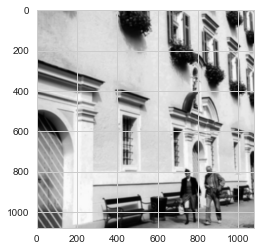

In [41]:
imagePath=pathlist[0]
image = cv2.imread(imagePath)
plt.imshow(image, cmap = 'gray', interpolation = 'bicubic')
plt.show()

In [16]:
line_col=[]
for m in range(1,5):
    name="len1/%i"%(m*30)
    templist=[]
    for i in range(len(pathlist)):
        try:
            imagePath=pathlist[i]
            image = cv2.imread(imagePath)
            gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
            edges = cv2.Canny(gray,image.shape[0],image.shape[1],apertureSize = 3)
            lines = cv2.HoughLines(edges,1,np.pi/180,min(int(image.shape[0]/(m*30)),int(image.shape[1]/(m*30))))
            templist.append(len(lines))
        except:
            templist.append(0)
    line_col.append(templist)                                               

In [138]:
result['len1/30']=line_col[0]
result['len1/60']=line_col[1]
result['len1/90']=line_col[2]
result['len1/120']=line_col[3]
#len(line_col[1])

2412

In [19]:
image_df=result[result.nudity>=0]
image_df.shape
#list(image_df)

(2222, 26)

In [263]:
image_df
#list(image_df)

In [149]:
df=image_df.copy()
df.describe()

,comment,like,avg_hue,std_hue,avg_sat,std_sat,avg_val,std_val,face_count,nudity,height,width,corner,len1/30,len1/60,len1/90,len1/120
count,2222.000000,2222.000000,2222.000000,2222.000000,2222.000000,2222.000000,2222.000000,2222.000000,2222.000000,2222.000000,2222.000000,2222.000000,2.222000e+03,2222.000000,2222.000000,2222.000000,2222.000000
mean,4.539154,151.546355,0.317197,0.227745,0.297547,0.198745,0.555049,0.255223,0.172367,0.096154,917.666067,910.427543,1.582285e+05,1203.835284,2210.155266,2906.707921,3416.870387
std,11.596163,1179.401775,0.179772,0.103585,0.176274,0.090346,0.174758,0.063854,0.579937,0.118417,281.310022,233.061273,1.928592e+05,3170.372483,4482.821027,5171.418535,5619.199173
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003920,0.000000,0.000000,0.000000,167.000000,320.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,0.000000,20.250000,0.181905,0.169240,0.176601,0.144696,0.442065,0.217620,0.000000,0.007337,718.000000,720.000000,3.219300e+04,0.000000,0.000000,0.000000,0.000000
50%,1.000000,51.000000,0.311036,0.240129,0.289840,0.203330,0.552392,0.258411,0.000000,0.054156,984.500000,1080.000000,8.744300e+04,0.000000,8.000000,34.000000,78.000000
75%,4.000000,116.000000,0.447378,0.298487,0.405575,0.259603,0.671515,0.298144,0.000000,0.144049,1080.000000,1080.000000,2.062952e+05,132.500000,1419.000000,3653.500000,5493.000000
max,211.000000,53158.000000,0.925944,0.491471,0.976339,0.459107,1.000000,0.461588,8.000000,0.825368,1440.000000,1618.000000,1.310996e+06,19764.000000,22821.000000,24250.000000,27437.000000


In [542]:
pkl_file = open('/Users/yanxinzhou/Course/Math564/project/with_kelvins.pkl', 'rb')
kelvin_df= pickle.load(pkl_file)
pkl_file.close()

In [543]:
#image_df['kelvins']=kelvin_df['kelvins']

In [ ]:
#get new image_path
file_path=df.dict.tolist()
img_name=df.name.tolist()
pathlist=['/Users/yanxinzhou/Course/Math564/project/nyc/'+file_path[i]+'/'+img_name[i] for i in range(len(file_path))]
y=image_df['like']
df=image_df.drop(['Likes','dict','name','Biography','comment','Comments'], axis=1)
df=df.apply(pd.to_numeric)

In [89]:
df.describe()
basic_feature=list(df)

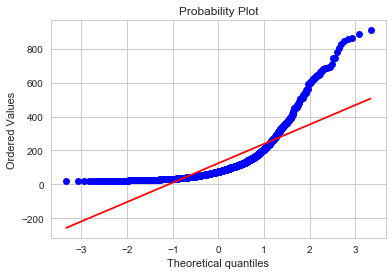

In [45]:
statsa.probplot(y[(y.values>20) & (y.values<1000)],plot=plt)
plt.show()

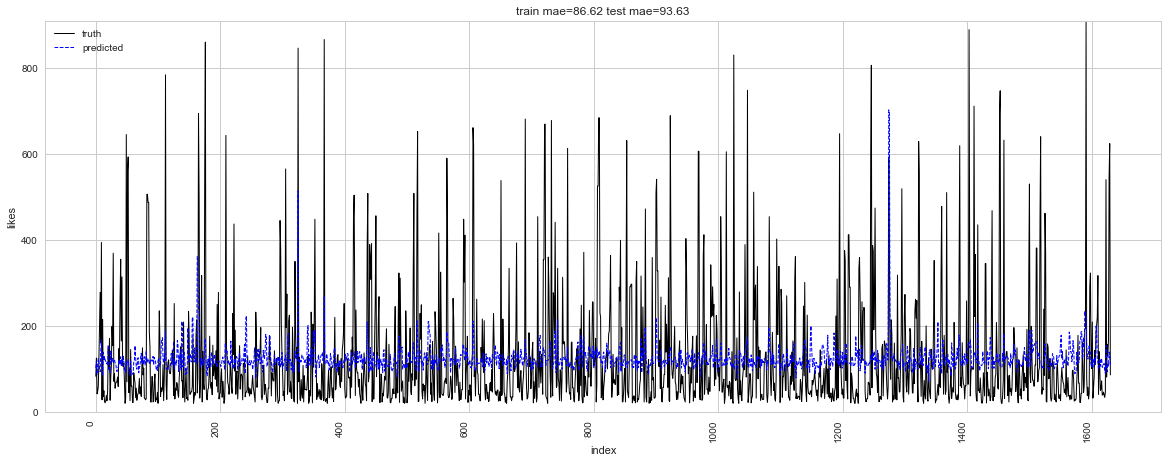

[('std_hue', 23.606669678339632),
 ('avg_val', 11.707153362980341),
 ('face_count', 8.2405252193900491),
 ('width', 0.017965876051243532),
 ('Posts', 0.011370162288927109),
 ('height', 0.0084490470989976411),
 ('Following', 0.0063033831190131614),
 ('Followers', 0.005384187963388915),
 ('len1/120', 0.00039258214466543045),
 ('len1/90', 0.00026718324413664498),
 ('len1/60', 0.00011408907800622073),
 ('corner', 2.2198615118671856e-05),
 ('Views', -6.0113575796646452e-05),
 ('len1/30', -0.00055315208847190277),
 ('std_sat', -1.5313305856191031),
 ('nudity', -3.3748324109475076),
 ('std_val', -13.176928257997041),
 ('avg_hue', -20.850423536965771),
 ('avg_sat', -32.040118291778164)]

intercept=84.121679
                            OLS Regression Results                            
Dep. Variable:                   like   R-squared:                       0.517
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     90.94
Date:                Fri, 01 Dec 2017   Prob (F-statistic):          1.72e-238
Time:                        22:08:11   Log-Likelihood:                -10239.
No. Observations:                1631   AIC:                         2.052e+04
Df Residuals:                    1612   BIC:                         2.062e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Followers      0.0139      0.001

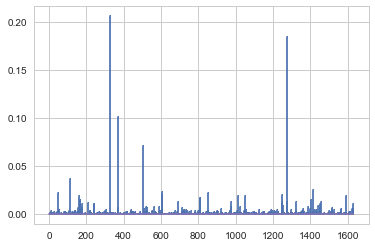

In [60]:
## simplest model
df_s=df[(df.like>20) & (df.like<1000) ].copy()
y_s=df_s.like
df_s.drop('like',axis=1,inplace=True)
skmodel,olsmodel=regression(df_s,y_s,list(df_s))

the correlation of prediction of sklearn and true value =0.312007500937 


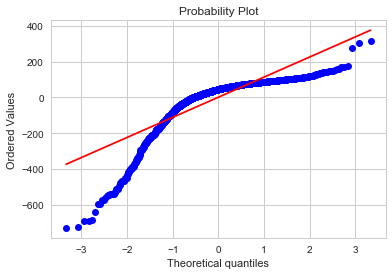

In [83]:
pred_sk=skmodel.predict(df_s)
pred_ols=olsmodel.predict(df_s)
err_sk=np.array(pred_sk)-np.array(y_s.tolist())
err_ols=np.array(pred_ols)-np.array(y_s.tolist())
statsa.probplot(err_sk,plot=plt)
cor_sk=st.pearsonr(pred_sk, y_s)
print('the correlation of prediction of sklearn and true value =%s '%(cor_sk[0]))
plt.show()

the correlation of prediction of sklearn and true value =0.351274805405 


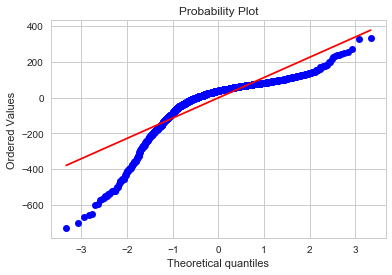

In [85]:
pred_sk=skmodel.predict(df_s)
pred_ols=olsmodel.predict(df_s)
err_sk=np.array(pred_sk)-np.array(y_s.tolist())
err_ols=np.array(pred_ols)-np.array(y_s.tolist())
statsa.probplot(err_ols,plot=plt)
cor_ols=st.pearsonr(pred_ols, y_s)
print('the correlation of prediction of sklearn and true value =%s '%(cor_ols[0]))
plt.show()

In [47]:
output = open('/Users/yanxinzhou/Course/Math564/project/new_df.pkl', 'wb')
pickle.dump(df, output, -1)
output.close()

In [13]:
pkl_file = open('/Users/yanxinzhou/Course/Math564/project/new_df.pkl', 'rb')
df= pickle.load(pkl_file)
pkl_file.close()

In [93]:
df_c=df[(df.like>20) & (df.like<1000) ].copy()
y_c=df_c.like
df_c.drop('like',axis=1,inplace=True)
basic_feature=list(df_c)

In [94]:
features=list(df_c)
for i in range(len(features)):
    for j in range(len(features)):
        if j>i:
            k1=features[i]
            k2=features[j]
            new_feature='%s__x__%s' % (k1, k2)
            df_c[new_feature]=df_c[k1]*df_c[k2]


In [96]:
features=basic_feature
for i in range(len(features)):
            k1=features[i]
            new_feature='%s^2' % (k1)
            df_c[new_feature]=df_c[k1]*df_c[k1]

In [176]:
list(df_c)

['Followers',
 'Following',
 'Posts',
 'Views',
 'avg_hue',
 'std_hue',
 'avg_sat',
 'std_sat',
 'avg_val',
 'std_val',
 'face_count',
 'nudity',
 'height',
 'width',
 'corner',
 'len1/30',
 'len1/60',
 'len1/90',
 'len1/120',
 'Followers__x__Following',
 'Followers__x__Posts',
 'Followers__x__Views',
 'Followers__x__avg_hue',
 'Followers__x__std_hue',
 'Followers__x__avg_sat',
 'Followers__x__std_sat',
 'Followers__x__avg_val',
 'Followers__x__std_val',
 'Followers__x__face_count',
 'Followers__x__nudity',
 'Followers__x__height',
 'Followers__x__width',
 'Followers__x__corner',
 'Followers__x__len1/30',
 'Followers__x__len1/60',
 'Followers__x__len1/90',
 'Followers__x__len1/120',
 'Following__x__Posts',
 'Following__x__Views',
 'Following__x__avg_hue',
 'Following__x__std_hue',
 'Following__x__avg_sat',
 'Following__x__std_sat',
 'Following__x__avg_val',
 'Following__x__std_val',
 'Following__x__face_count',
 'Following__x__nudity',
 'Following__x__height',
 'Following__x__width',
 

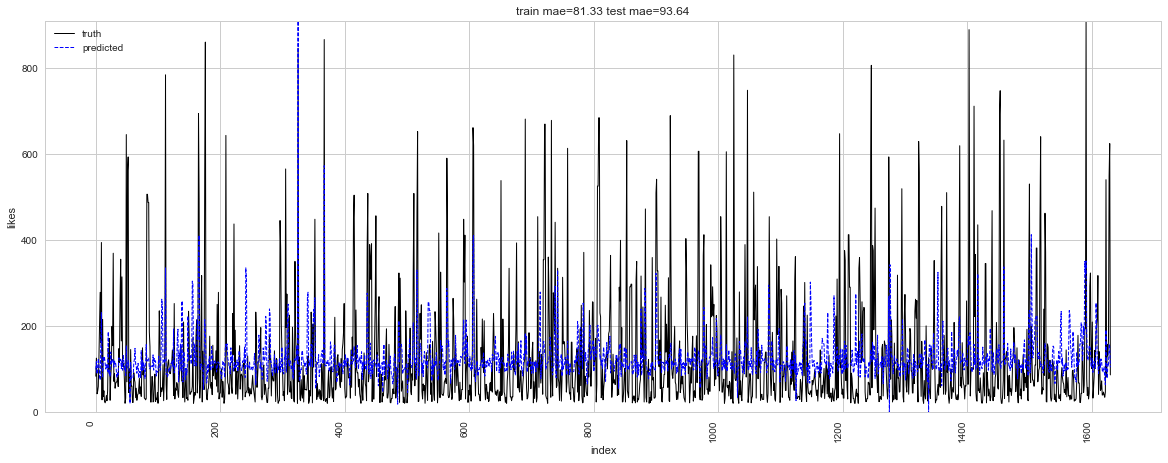

[('std_sat__x__avg_val', 38.895916514018026),
 ('std_sat__x__nudity', 31.7742252247488),
 ('std_hue__x__avg_val', 23.523410955554713),
 ('avg_hue__x__nudity', 20.880653282850236),
 ('face_count__x__nudity', 14.194092267586466),
 ('std_hue__x__face_count', 13.340895942666412),
 ('avg_val__x__nudity', 10.672229473776133),
 ('std_sat^2', 8.0801852810381227),
 ('avg_val__x__face_count', 7.1857413273462685),
 ('std_hue', 6.4602505801511958),
 ('std_sat', 2.800268391167287),
 ('std_hue__x__avg_sat', 2.0794451211908718),
 ('std_hue__x__std_sat', 1.8000084618446954),
 ('std_val__x__face_count', 1.4123053313512239),
 ('face_count^2', 1.052207152311847),
 ('face_count', 0.48409937969237132),
 ('Posts__x__std_hue', 0.030978265511256483),
 ('std_hue__x__width', 0.017331864182058364),
 ('Posts__x__avg_hue', 0.016015323592482034),
 ('std_sat__x__width', 0.014206627061901003)]

intercept=96.490751
                            OLS Regression Results                            
Dep. Variable:                   like   R-squared:                       0.346
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                     3.874
Date:                Fri, 01 Dec 2017   Prob (F-statistic):           7.71e-50
Time:                        22:45:32   Log-Likelihood:                -9998.8
No. Observations:                1631   AIC:                         2.039e+04
Df Residuals:                    1434   BIC:                         2.145e+04
Df Model:                         196                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Foll

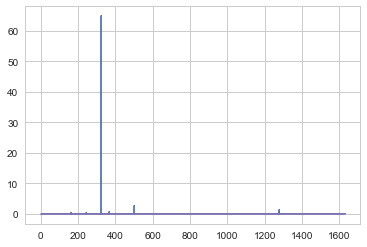

In [105]:
## overfitting model
skmodel,olsmodel=regression(df_c,y_c,list(df_c))

In [107]:
df_c.shape
#y_c.shape

(1631, 209)

the correlation of prediction of sklearn and true value =0.4051945511 


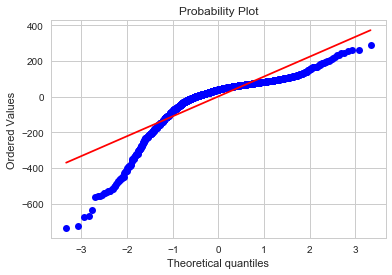

In [106]:
pred_sk=skmodel.predict(df_c)
pred_ols=olsmodel.predict(df_c)
err_sk=np.array(pred_sk)-np.array(y_c.tolist())
err_ols=np.array(pred_ols)-np.array(y_c.tolist())
statsa.probplot(err_sk,plot=plt)
cor_sk=st.pearsonr(pred_sk, y_c)
print('the correlation of prediction of sklearn and true value =%s '%(cor_sk[0]))
plt.show()

the correlation of prediction of sklearn and true value =0.4051945511 


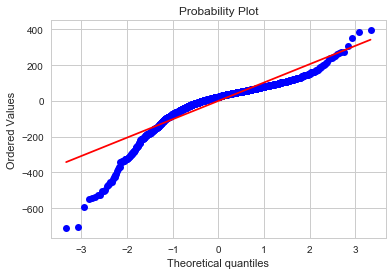

In [108]:
pred_sk=skmodel.predict(df_c)
pred_ols=olsmodel.predict(df_c)
err_sk=np.array(pred_sk)-np.array(y_c.tolist())
err_ols=np.array(pred_ols)-np.array(y_c.tolist())
statsa.probplot(err_ols,plot=plt)
cor_sk=st.pearsonr(pred_sk, y_c)
print('the correlation of prediction of sklearn and true value =%s '%(cor_sk[0]))
plt.show()

## add the interaction term

## Kmeans or GMM

In [190]:
g=df.Followers.copy().to_frame(name='x')
g['y']=pd.Series(0,index=y.index)
#df['y']=y
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(df[['Followers','like']])
df['label'] =pd.Series(kmeans.labels_, index=y.index)

df_nu=df[(df.label==0)].copy()
df_nu=df_nu[(df_nu.like>20) & (df_nu.like<1000) ]

y_nu=df_nu['like']
df_nu=df_nu.drop(['like','Likes','dict','name','Biography','comment','Comments'], axis=1)
#df_nu=df.drop('label',axis=1,inplace=True)
#y_nu=df_nu['y']
df_nu.drop('label',axis=1,inplace=True)
df_nu.drop('y',axis=1,inplace=True)



In [205]:
df_nu.head()
df_nu.shape
list(df_nu)
df_nu=df_nu.apply(pd.to_numeric, errors='ignore')
df_nu.dtypes

Followers       int64
Following       int64
Posts           int64
Views           int64
avg_hue       float64
std_hue       float64
avg_sat       float64
std_sat       float64
avg_val       float64
std_val       float64
face_count      int64
nudity        float64
height          int64
width           int64
corner          int64
len1/30         int64
len1/60         int64
len1/90         int64
len1/120        int64
dtype: object

In [206]:
features=list(df_nu)
for i in range(len(features)):
    for j in range(len(features)):
        if j>i:
            k1=features[i]
            k2=features[j]
            new_feature='%s__x__%s' % (k1, k2)
            df_nu[new_feature]=df_nu[k1]*df_nu[k2]

In [207]:
for i in range(len(features)):
            k1=features[i]
            new_feature='%s^2' % (k1)
            df_nu[new_feature]=df_nu[k1]*df_nu[k1]

In [209]:
df_nu.head()

,Followers,Following,Posts,Views,avg_hue,std_hue,avg_sat,std_sat,avg_val,std_val,...,std_val^2,face_count^2,nudity^2,height^2,width^2,corner^2,len1/30^2,len1/60^2,len1/90^2,len1/120^2
1639954703309610851,440,553,25,72,0.182617,0.215727,0.368807,0.264291,0.425571,0.286147,...,0.081880,0,0.061293,599076,599076,17415289089,1,225,2116,11236
1632536891238863966,440,553,25,72,0.139848,0.253038,0.091082,0.153488,0.314029,0.224458,...,0.050381,1,0.000285,409600,409600,405941904,5776,418609,3200521,10758400
1644086042168171288,211,99,2,0,0.103685,0.161166,0.643664,0.417476,0.064938,0.137303,...,0.018852,0,0.000018,1024144,656100,43681,0,0,0,0
1637808460464544466,211,99,2,0,0.000000,0.000000,0.000000,0.000000,0.672604,0.222980,...,0.049720,0,0.000000,640000,409600,5475260025,36,5184,80656,693889
1646362414905797475,1510,901,14,0,0.166258,0.216982,0.415751,0.263377,0.576452,0.202343,...,0.040942,0,0.091226,1822500,1166400,55372678596,0,0,0,0


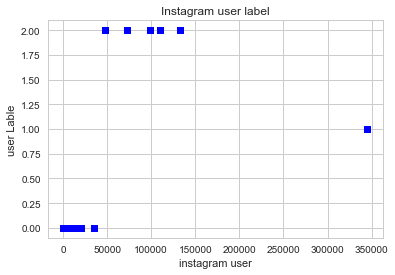

In [116]:
df_cluser=df.Followers.copy().to_frame(name='x')
df_cluser['y']=pd.Series(kmeans.labels_, index=y.index)
plt.plot(df_cluser.x, df_cluser.y,'bs') #plotting
plt.xlabel('instagram user')
plt.ylabel('user Lable')
plt.title('Instagram user label')
plt.show()

In [157]:
def do_train_test(X_df,y_df, train_end):
     
    X_train = X_df[:train_end]
    X_test =X_df[train_end:]
    model = Ridge(normalize=True)
    model.fit(X_train, y_df[:train_end])
    preds = np.concatenate((
                model.predict(X_train),
                model.predict(X_test)
            ))
    preds=pd.DataFrame(preds, index=X_df.index)
    return model, preds
def plot_predictions(preds, y, train_end):
    plt.figure(figsize=(20, 8))
    ax1 = plt.gca()
    #ax1.set_xticks(preds.index) 
    train_MAE=float("%.2f" %(mean_absolute_error(preds[:train_end], y[:train_end])))
    test_MAE=float("%.2f" %(mean_absolute_error(preds[train_end:], y[train_end:])))
    ax1.set_title('train mae=%.2f test mae=%.2f' % 
                  (
                   train_MAE,
                   test_MAE,
                  )
                 )
    ax1.plot(range(len(y.tolist())), y.values.tolist(), 'k-', lw=1, label='truth')#get hour
    ax1.plot(range(len(y.tolist())), preds.values.tolist(), 'b--', lw=1, label='predicted')
    #ax1.axvline(x=y.index[train_end], color='green')
    #hfmt = dates.DateFormatter('%m/%d %H:%M')
    #ax1.xaxis.set_major_formatter(hfmt)
    ax1.set_ylim((0, max(max(y.tolist()), max(preds))))
    plt.gcf().autofmt_xdate(rotation=90)
    plt.xlabel('index')
    plt.legend(loc='best')
    plt.ylabel('likes')
    plt.show()
    #return train_cor, test_cor,train_MAE,test_MAE
    return train_MAE,test_MAE
def print_coef(X_df, model):
    display([x for x in sorted(zip(X_df.axes[1].values, model.coef_), key=lambda i: -i[1])[:20]])
    print('intercept=%f' % model.intercept_)
def regression(df,y,feature,train_fraction=0.7):
    #all_test_corrs=[]
    all_test_maes=[]
    #train&test
    train_end = int(train_fraction * len(y))
    skmodel, preds = do_train_test(df[feature],y, train_end)
    # correlation & mae
    all_test_maes.append(mean_absolute_error(preds[train_end:], y[train_end:]))
    
    train_MAE,test_MAE=plot_predictions(preds, y, train_end)

    print_coef(df[feature], skmodel)
    ##############
    c,p,olsmodel=statistic(df,y)
    return skmodel,olsmodel
 

In [210]:
def stepwise(df,y,k=0):
    
    #if k>0, limit the number of praditors
    if k>0:
        parameter_bound=k
    else:
        parameter_bound=1000000000000000000
    feature_pool=np.array([])
    test_pool=np.array(list(df))
    a_entry=0.05
    a_stay=0.1
    min_pvalue=0
    ind=0
    while (len(feature_pool)<parameter_bound) and ind<len(list(df)):
        print(parameter_bound,min_pvalue,ind)
        ind+=1
        #step1:begin regression models
        min_pvalue=1 #activate
        max_tvalue=0
        temp_fea=None # current adding feature

        for fe in test_pool:
            temp_pool=feature_pool.copy()
            temp_pool=np.append(temp_pool,fe)
            est = sm.OLS(y, df[temp_pool]).fit()
            if min_pvalue>est.pvalues[fe]:
                min_pvalue=est.pvalues[fe]
            if max_tvalue<math.fabs(est.tvalues[fe]) and a_entry>est.pvalues[fe] :
                max_tvalue=math.fabs(est.tvalues[fe])
                temp_fea=fe
                temp_model=est

        #step2: estimate a-stay
        if temp_fea:

            feature_pool=np.append(feature_pool,temp_fea)
            #print(y.shape,df.shape,feature_pool)
            temp_model=sm.OLS(y, df[feature_pool]).fit()
            pass_num=1
            for p in temp_model.pvalues:
                if p>a_stay:
                    pass_num=0
                    break
            #print(temp_model.summary())
            if pass_num:
                index = np.argwhere(test_pool==temp_fea)
                test_pool = np.delete(test_pool, index)
            else:
                index = np.argwhere(test_pool==temp_fea)
                test_pool = np.delete(test_pool, index)
                
                index = np.argwhere(feature_pool==temp_fea)
                feature_pool = np.delete(feature_pool, index)
        #print(feature_pool,min_pvalue,ind)
        
    return feature_pool

feature_selection =stepwise(df_nu,y_nu,210) 


210 0 0
210 1.62764003995e-205 1
210 2.24671688376e-55 2
210 1.23165711469e-21 3
210 3.60114928796e-07 4
210 2.41188188044e-07 5
210 2.40584659691e-06 6
210 9.51346136179e-05 7
210 0.000368316982714 8
210 0.000319173152744 9
210 0.00102935369841 10
210 0.000452716465693 11
210 0.00394582289907 12
210 0.00691845066753 13
210 0.0190811346022 14
210 0.0249273623079 15
210 0.0238119984171 16
210 0.0327231281567 17
210 0.0295616191538 18
210 0.0418048529129 19
210 0.0469897557436 20
210 0.0511581073281 21
210 0.0511581073281 22
210 0.0511581073281 23
210 0.0511581073281 24
210 0.0511581073281 25
210 0.0511581073281 26
210 0.0511581073281 27
210 0.0511581073281 28
210 0.0511581073281 29
210 0.0511581073281 30
210 0.0511581073281 31
210 0.0511581073281 32
210 0.0511581073281 33
210 0.0511581073281 34
210 0.0511581073281 35
210 0.0511581073281 36
210 0.0511581073281 37
210 0.0511581073281 38
210 0.0511581073281 39
210 0.0511581073281 40
210 0.0511581073281 41
210 0.0511581073281 42
210 0.05115

In [211]:
feature_selection

array(['width', 'Followers', 'Followers^2', 'width^2',
       'Followers__x__avg_hue', 'Posts__x__std_val', 'Followers__x__Views',
       'Posts^2', 'face_count^2', 'Followers__x__corner',
       'Followers__x__std_hue', 'Following__x__height', 'Posts__x__nudity',
       'Following__x__std_val', 'Followers__x__Posts', 'Posts__x__avg_hue',
       'avg_sat__x__face_count', 'Followers__x__avg_val',
       'Followers__x__nudity', 'face_count__x__width'], 
      dtype='<U32')

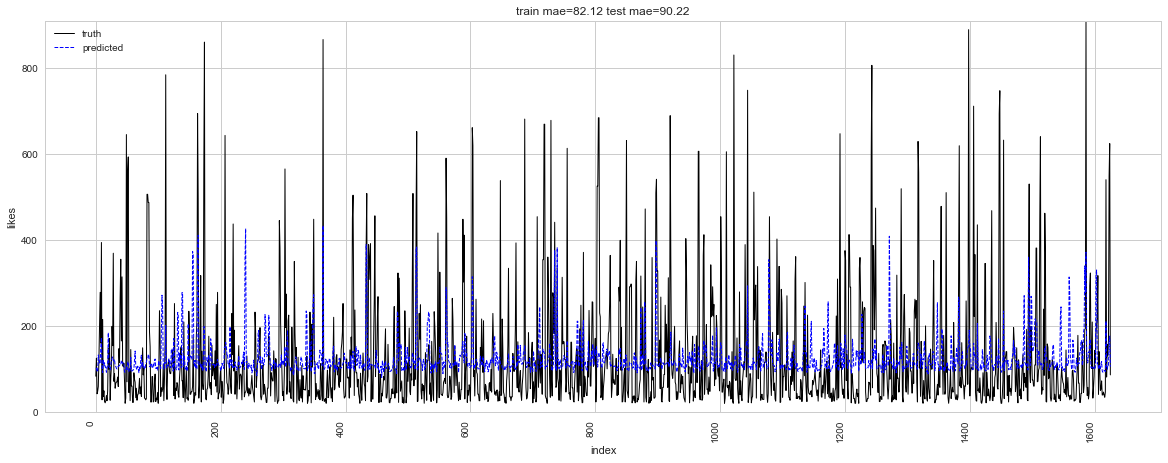

[('face_count^2', 1.6993661062200756),
 ('Followers__x__nudity', 0.021657124600192382),
 ('Followers__x__std_hue', 0.015160339515885147),
 ('Following__x__std_val', 0.010168929137630296),
 ('width', 0.0084395760952242684),
 ('Followers__x__avg_val', 0.0060562097313559002),
 ('face_count__x__width', 0.0054528432362583217),
 ('Followers', 0.0038824592327207537),
 ('Followers__x__avg_hue', 0.00031582398706986119),
 ('Posts^2', 2.0285590754772513e-05),
 ('width^2', 3.5913183543424729e-06),
 ('Following__x__height', 3.4081285014909648e-06),
 ('Followers__x__Posts', 2.6170957228308329e-06),
 ('Followers__x__Views', 7.0483058038813957e-08),
 ('Followers__x__corner', 1.1333351198011725e-08),
 ('Followers^2', -3.767177027406708e-08),
 ('Posts__x__avg_hue', -0.016552897448120191),
 ('Posts__x__std_val', -0.074887031121526129),
 ('Posts__x__nudity', -0.080931714995851986),
 ('avg_sat__x__face_count', -6.6897744424869376)]

intercept=84.664927
                            OLS Regression Results                            
Dep. Variable:                   like   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     117.1
Date:                Sat, 02 Dec 2017   Prob (F-statistic):          7.17e-296
Time:                        00:10:49   Log-Likelihood:                -10053.
No. Observations:                1626   AIC:                         2.015e+04
Df Residuals:                    1606   BIC:                         2.025e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
width   

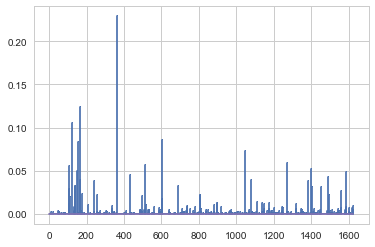

In [212]:
skmodel,olsmodel=regression(df_nu[feature_selection],y_nu,list(df_nu[feature_selection]))

the correlation of prediction of sklearn and true value =0.383269692951 


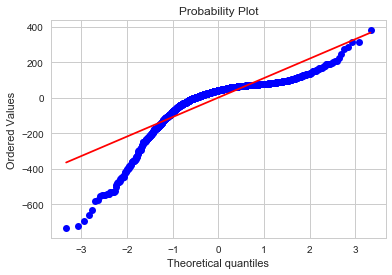

In [214]:
pred_sk=skmodel.predict(df_nu[feature_selection])
pred_ols=olsmodel.predict(df_nu[feature_selection])
err_sk=np.array(pred_sk)-np.array(y_nu.tolist())
err_ols=np.array(pred_ols)-np.array(y_nu.tolist())
statsa.probplot(err_sk,plot=plt)
cor_sk=st.pearsonr(pred_sk, y_nu)
print('the correlation of prediction of sklearn and true value =%s '%(cor_sk[0]))
plt.show()

the correlation of prediction of sklearn and true value =0.506929551248 


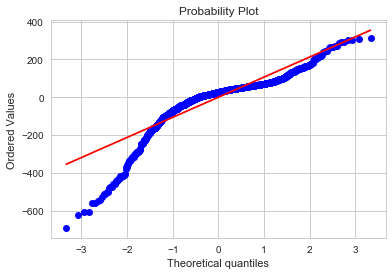

In [215]:
pred_sk=skmodel.predict(df_nu[feature_selection])
pred_ols=olsmodel.predict(df_nu[feature_selection])
err_sk=np.array(pred_sk)-np.array(y_nu.tolist())
err_ols=np.array(pred_ols)-np.array(y_nu.tolist())
statsa.probplot(err_ols,plot=plt)
cor_sk=st.pearsonr(pred_ols, y_nu)
print('the correlation of prediction of sklearn and true value =%s '%(cor_sk[0]))
plt.show()

In [55]:
def statistic(df,y):
    ## fit a OLS model with intercept on TV and Radio
    #df_X = sm.add_constant(df.as_matrix().astype(float))
    est = sm.OLS(y, df).fit()
    print(est.summary())
    ### cook's D
    influence = est.get_influence()
    (c, p) = influence.cooks_distance
    plt.stem(np.arange(len(c)), c, markerfmt=",")
    plt.show()
    return c,p,est

In [52]:
def Synchronize(df,y,c):
    influencial_list=[i for i in range(len(c))  if c[i]>0.8]
    influencial_list=[int(df.iloc[i].name) for i in influencial_list]
    # Synchronize df
    for i in influencial_list:
        df.drop('%i'%(i),inplace=True)
        y.drop('%i'%(i),inplace=True)
    return df
#Synchronize(df,y,c)

In [10]:
olsmodel
type(df_nu[feature_selection].iloc(0))
#df_nu.iloc(10)[0]
tt=list(df_nu[feature_selection])
tt

NameError: name 'olsmodel' is not defined

In [403]:
def processimage(img_file):
    img = img_file.load()
    [xs, ys] = img_file.size
    hues =[]
    saturation=[]
    value=[]
    hsv_=[]
    for x in range(0, xs):
        for y in range(0, ys):
            [r, g, b]= img[x, y]
            r /= 255.0
            g /= 255.0
            b /= 255.0
            [h, s, v] = colorsys.rgb_to_hsv(r, g, b)
            hues.append(h)
            saturation.append(s)
            value.append(v)
    hues=np.array(hues)      
    saturation=np.array(saturation) 
    value=np.array(value) 
    hsv1_=[np.sum(hues)/(xs*ys),np.std(hues),np.sum(saturation)/(xs*ys),np.std(saturation),np.sum(value)/(xs*ys),np.std(value)]
    return hsv1_

In [404]:
from PIL import Image
import colorsys
def picinfo(df):
    
    #get hsv
    img_file1 = Image.open('/Users/yanxinzhou/Course/Math564/project/Instagram_files/%i.png'%(df.index[0]))
    bg = Image.new("RGB", img_file1.size, (255,255,255))
    bg.paste(img_file1,img_file1)
    bg.save("1.jpg")
    img_file2 = Image.open("1.jpg")
    hsv=processimage(img_file2)
    
    df['avg_hue']=hsv[0]
    df['std_hue']=hsv[1]
    df['avg_sat']=hsv[2]
    df['std_sat']=hsv[3]
    df['avg_val']=hsv[4]
    df['std_val']=hsv[5]
    
    # height_, width
    img_file2="1.jpg"
    img = cv2.imread(img_file2)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    height_, width_, channels_ = img.shape
    df['height']=height_
    df['width']=width_
    
    # face count
    faces = haar_face_cascade1.detectMultiScale(gray, scaleFactor=1.8, minNeighbors=5);
    face_count=len(faces)
    df['face_count']=face_count
    
    #nudity
    nudity=detectskin(img_file2)
    df['nudity']=nudity
    
    #add corners
    gray1 = np.float32(gray)
    dst = cv2.cornerHarris(gray1,2,3,0.04)
    dst = cv2.dilate(dst,None)
    temp=dst>10000
    corner=len(dst[temp])
    df['corner']=corner
    
    #add line

    edges = cv2.Canny(gray,image.shape[0],image.shape[1],apertureSize = 3)
    lines30 = cv2.HoughLines(edges,1,np.pi/180,min(int(image.shape[0]/(m*30)),int(image.shape[1]/(m*30))))
    lines60 = cv2.HoughLines(edges,1,np.pi/180,min(int(image.shape[0]/(m*60)),int(image.shape[1]/(m*60))))
    lines90 = cv2.HoughLines(edges,1,np.pi/180,min(int(image.shape[0]/(m*90)),int(image.shape[1]/(m*90))))
    lines120 = cv2.HoughLines(edges,1,np.pi/180,min(int(image.shape[0]/(m*1200)),int(image.shape[1]/(m*120))))
       
    try:
        df['len1/30']=lines30
    except ValueError:
        df['len1/30']=0
    try:
        df['len1/60']=lines60
    except ValueError:
        df['len1/60']=0       
    try:
        df['len1/90']=lines90
    except ValueError:
        df['len1/90']=0        
    try:
        df['len1/120']=lines30
    except ValueError:
        df['len1/120']=0
        
        
    #interaction term
    features=list(df)
    for i in range(len(features)):
        for j in range(len(features)):
            if j!=i:
                k1=features[i]
                k2=features[j]
                new_feature='%s__x__%s' % (k1, k2)
                df[new_feature]=df[k1]*df[k2]
    
    for i in range(len(features)):
            k1=features[i]
            new_feature='%s^2' % (k1)
            df[new_feature]=df[k1]*df[k1]
    return df

In [460]:
path='/Users/yanxinzhou/Course/Math564/project/Instagram_files/remaining.csv'
df_test=DataFrame.from_csv(path)

In [461]:
y=df_test['Like on pic ']
df_test.drop(['Link','Biography','Comments','Like on pic ','Likes'],axis=1, inplace=True)


In [1]:
df_test

NameError: name 'df_test' is not defined

In [2]:
pic_list=df_test[df_test.index==1]

NameError: name 'df_test' is not defined

In [464]:
df_1=picinfo(pic_list)
y_1=olsmodel.get_prediction(df_1[feature_selection])
xx=y_1.summary_frame(alpha=0.05)
y_1=xx['mean']
y_1l=xx['mean_ci_lower']
y_1h=xx['mean_ci_upper']
print('point estimation: %f'%(y_1),', true value: %f'%(y[y.index==1]),'CI_l: %f'%(y_1l),'CI_h: %f'%(y_1h))

/Users/yanxinzhou/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/Users/yanxinzhou/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/yanxinzhou/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

point estimation: 85.463966 , true value: 80.000000 CI_l: 65.543398 CI_h: 105.384534


1    0
Name: face_count, dtype: int64

In [444]:
pic_list=df_test[df_test.index==2]

In [445]:
df_1=picinfo(pic_list)
y_1=olsmodel.get_prediction(df_1[feature_selection])
xx=y_1.summary_frame(alpha=0.05)
y_1=xx['mean']
y_1l=xx['mean_ci_lower']
y_1h=xx['mean_ci_upper']
print('point estimation: %f'%(y_1),', true value: %f'%(y[y.index==2]),'CI_l: %f'%(y_1l),'CI_h: %f'%(y_1h))

/Users/yanxinzhou/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/Users/yanxinzhou/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/yanxinzhou/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

point estimation: 14.310023 , true value: 99.000000 CI_l: -15.553639 CI_h: 44.173686


In [446]:
pic_list=df_test[df_test.index==3]

In [447]:
df_1=picinfo(pic_list)
y_1=olsmodel.get_prediction(df_1[feature_selection])
xx=y_1.summary_frame(alpha=0.05)
y_1=xx['mean']
y_1l=xx['mean_ci_lower']
y_1h=xx['mean_ci_upper']
print('point estimation: %f'%(y_1),', true value: %f'%(y[y.index==3]),'CI_l: %f'%(y_1l),'CI_h: %f'%(y_1h))

/Users/yanxinzhou/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/Users/yanxinzhou/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/yanxinzhou/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

point estimation: 86.518386 , true value: 80.000000 CI_l: 77.298736 CI_h: 95.738035


In [456]:
pic_list=df_test[df_test.index==5]

In [457]:
df_1=picinfo(pic_list)
y_1=olsmodel.get_prediction(df_1[feature_selection])
xx=y_1.summary_frame(alpha=0.05)
y_1=xx['mean']
y_1l=xx['mean_ci_lower']
y_1h=xx['mean_ci_upper']
print('point estimation: %f'%(y_1),', true value: %f'%(y[y.index==5]),'CI_l: %f'%(y_1l),'CI_h: %f'%(y_1h))

/Users/yanxinzhou/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/Users/yanxinzhou/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/yanxinzhou/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

AssertionError: Shape of new values must be compatible with manager shape

In [467]:
pic_list=df_test[df_test.index==6]

In [468]:
df_1=picinfo(pic_list)
y_1=olsmodel.get_prediction(df_1[feature_selection])
xx=y_1.summary_frame(alpha=0.05)
y_1=xx['mean']
y_1l=xx['mean_ci_lower']
y_1h=xx['mean_ci_upper']
print('point estimation: %f'%(y_1),', true value: %f'%(y[y.index==6]),'CI_l: %f'%(y_1l),'CI_h: %f'%(y_1h))

/Users/yanxinzhou/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/Users/yanxinzhou/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/yanxinzhou/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

point estimation: 279.642406 , true value: 452.000000 CI_l: 210.726677 CI_h: 348.558134


In [470]:
df_1['nudity']

6    0.0
Name: nudity, dtype: float64